# **Reading data**

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
import random
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
import warnings
from google.colab import drive
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns', None)

In [ ]:
seed_constant = 42
np.random.seed(seed_constant)
random.seed(seed_constant)
tf.random.set_seed(seed_constant)

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
all_classes_names = os.listdir('/content/drive/MyDrive/Grapevine_Leaves_Image_Dataset/Train')
all_classes_names

['Ak', 'Nazli', 'Dimnit', 'Buzgulu', 'Ala_Idris']

In [ ]:
AK_path = '/content/drive/MyDrive/Grapevine_Leaves_Image_Dataset/Train/Ak'
Ala_path = '/content/drive/MyDrive/Grapevine_Leaves_Image_Dataset/Train/Ala_Idris'
buzgulu_path = '/content/drive/MyDrive/Grapevine_Leaves_Image_Dataset/Train/Buzgulu'
dimnit_path = '/content/drive/MyDrive/Grapevine_Leaves_Image_Dataset/Train/Dimnit'
nazli_path = '/content/drive/MyDrive/Grapevine_Leaves_Image_Dataset/Train/Nazli'



AK_files = os.listdir(AK_path)
Ala_files = os.listdir(Ala_path)
buzgulu_files = os.listdir(buzgulu_path)
dimnit_files = os.listdir(dimnit_path)
nazli_files = os.listdir(nazli_path)



print("length of AK:", len(AK_files))
print("length of Ala:", len(Ala_files))
print("length of buzhulu :", len(buzgulu_files))
print("length of dimnit:", len(dimnit_files))
print("length of nazli:", len(nazli_files))

length of AK: 70
length of Ala: 70
length of buzhulu : 70
length of dimnit: 70
length of nazli: 70


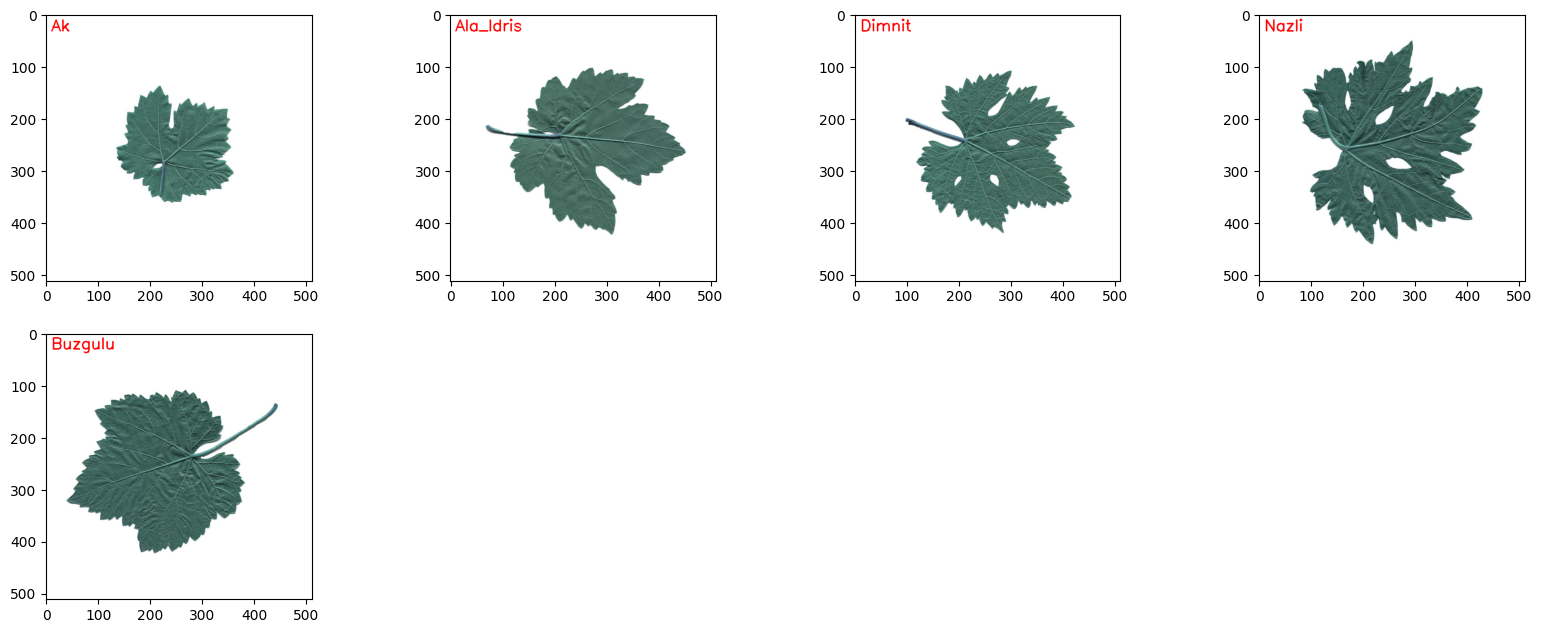

In [ ]:
plt.figure(figsize = (20,20))

random_range = random.sample(range(len(all_classes_names)), 5)

for counter, random_index in enumerate(random_range, 1):

    # Retrieve a Class Name using the Random Index.
    selected_class_Name = all_classes_names[random_index]

    # Retrieve the list of all the video files present in the randomly selected Class Directory.
    image_files_names_list = os.listdir(f'/content/drive/MyDrive/Grapevine_Leaves_Image_Dataset/Train/{selected_class_Name}')

    # Randomly select a video file from the list retrieved from the randomly selected Class Directory.
    selected_image_file_name = random.choice(image_files_names_list)

    img = cv2.imread(f'/content/drive/MyDrive/Grapevine_Leaves_Image_Dataset/Train/{selected_class_Name}/{selected_image_file_name}')

    cv2.putText(img, selected_class_Name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

    # Display the image.
    plt.subplot(5, 4, counter);plt.imshow(img);plt.axis('on')

# **Setting IMAGE SIZE**

In [ ]:
IMAGE_HEIGHT , IMAGE_WIDTH = 427,427

DATASET_DIR = "/content/drive/MyDrive/Grapevine_Leaves_Image_Dataset/Train"

CLASSES_LIST = ['Ak','Ala_Idris','Buzgulu','Dimnit','Nazli']

In [ ]:
input_shape = (IMAGE_HEIGHT,IMAGE_WIDTH,3)

In [ ]:
generator1=ImageDataGenerator(zoom_range=[0.6, 0.7])

generator2=ImageDataGenerator(zoom_range=[0.9, 1.0])

def create_dataset(class_name,class_index):
    '''
    This function will extract the data of the selected classes and create the
    required dataset.
    Returns:
        features:          A list containing the extracted images.
        labels:            A list containing the indexes of the classes associated with the images.
    '''

    features = []
    labels = []


    files_list = os.listdir(os.path.join(DATASET_DIR, class_name))
    i=0
    for file_name in files_list:

      img = os.path.join(DATASET_DIR, class_name, file_name)
      img=cv2.imread(img)

      white_pixels = (img[:, :, 0] > 240) & (img[:, :, 1] > 240) & (img[:, :, 2] > 240)
      percentage=np.sum(white_pixels)/(img.shape[0]*img.shape[1])*100
      # img[white_pixels] = 0

      if percentage >= 80:
         img=generator1.random_transform(img)
      else:
         img=generator2.random_transform(img)




      img = cv2.resize(img, (IMAGE_HEIGHT, IMAGE_WIDTH))

      img = img/255.0

      features.append(img)

      labels.append(class_index)
      i+=1
    print(f"Number of data in class {class_name} = ",i)

    features = np.array(features)
    labels = np.array(labels)

    return features, labels

In [ ]:
features_Ak, labels_Ak = create_dataset('Ak',0)

features_Ala_Idris, labels_Ala_Idris = create_dataset('Ala_Idris',1)

features_Buzgulu, labels_Buzgulu = create_dataset('Buzgulu',2)

features_Dimnit, labels_Dimnit = create_dataset('Dimnit',3)

features_Nazli, labels_Nazli = create_dataset('Nazli',4)

Number of data in class Ak =  70
Number of data in class Ala_Idris =  70
Number of data in class Buzgulu =  70
Number of data in class Dimnit =  70
Number of data in class Nazli =  70


In [ ]:
features_Ak.shape,labels_Ak.shape

((70, 427, 427, 3), (70,))

In [ ]:
features_Ala_Idris.shape,labels_Ala_Idris.shape

((70, 427, 427, 3), (70,))

In [ ]:
features_Buzgulu.shape,labels_Buzgulu.shape

((70, 427, 427, 3), (70,))

In [ ]:
features_Dimnit.shape,labels_Dimnit.shape

((70, 427, 427, 3), (70,))

In [ ]:
features_Nazli.shape,labels_Nazli.shape

((70, 427, 427, 3), (70,))

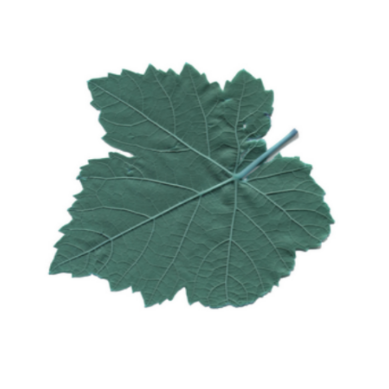

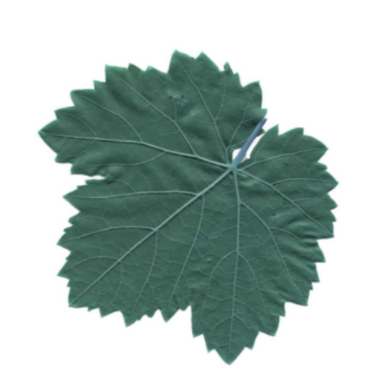

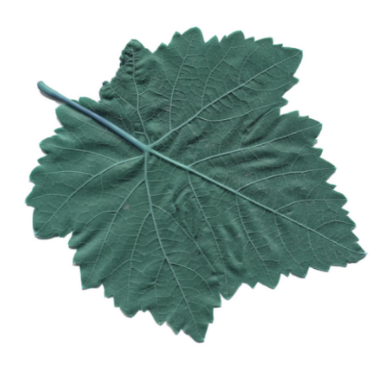

In [ ]:
for i in range(3):

  plt.imshow(features_Ak[i,:,:,:])
  plt.axis('off')
  plt.show()

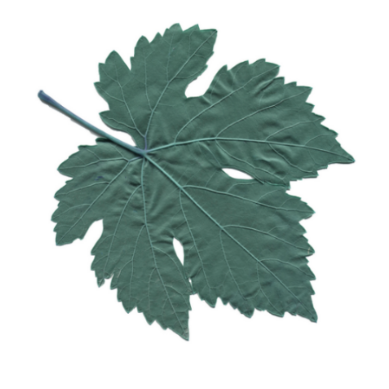

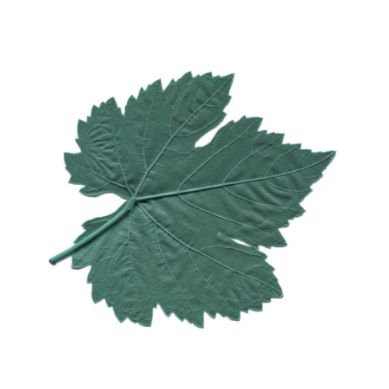

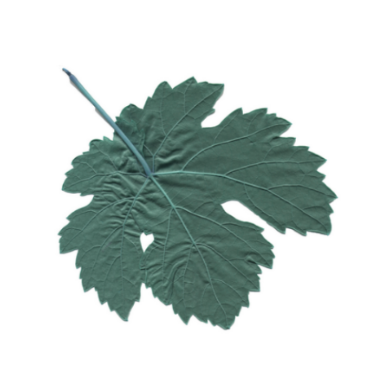

In [ ]:
for i in range(3):

  plt.imshow(features_Ala_Idris[i,:,:,:])
  plt.axis('off')
  plt.show()

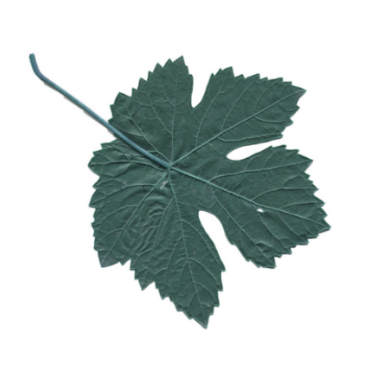

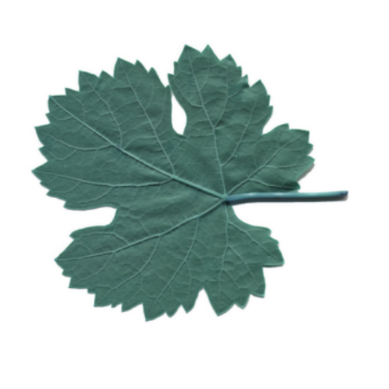

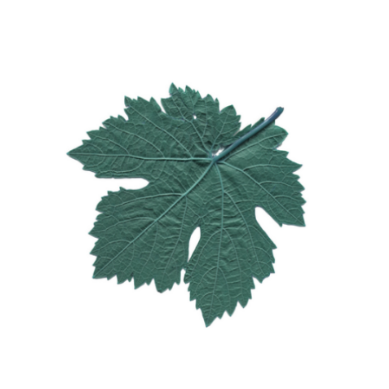

In [ ]:
for i in range(3):

  plt.imshow(features_Buzgulu[i,:,:,:])
  plt.axis('off')
  plt.show()

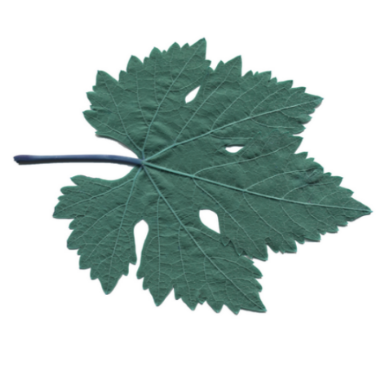

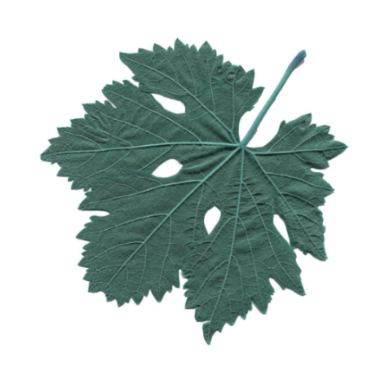

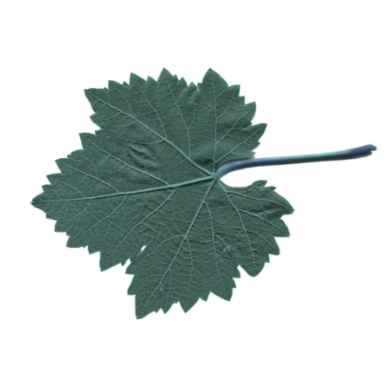

In [ ]:
for i in range(3):

  plt.imshow(features_Dimnit[i,:,:,:])
  plt.axis('off')
  plt.show()

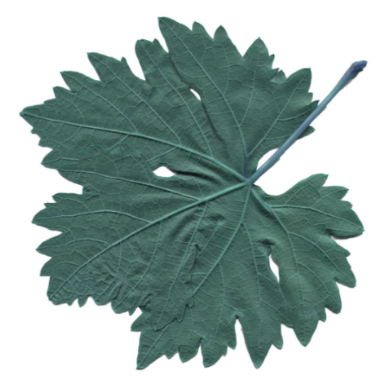

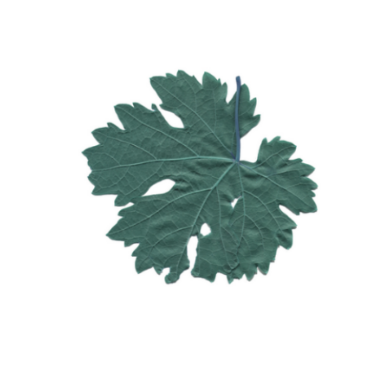

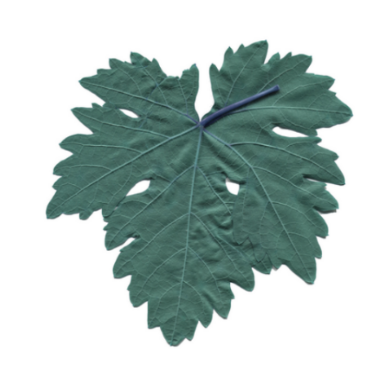

In [ ]:
for i in range(3):

  plt.imshow(features_Nazli[i,:,:,:])
  plt.axis('off')
  plt.show()

# **Augmentation**

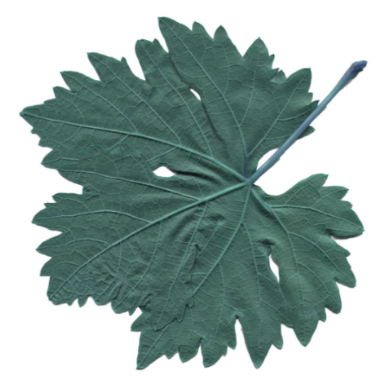

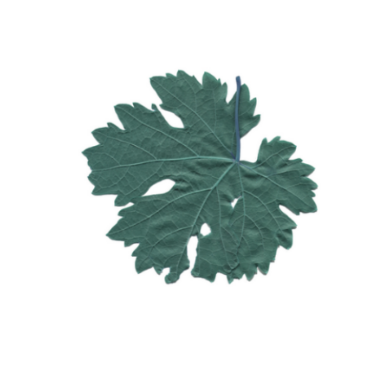

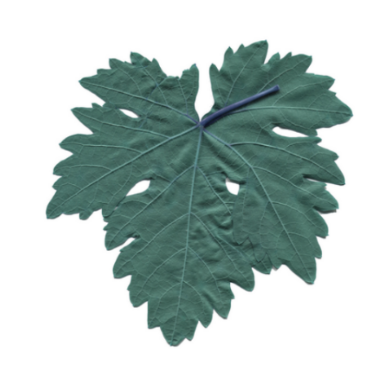

In [ ]:
for i in range(3):

  plt.imshow(features_Nazli[i,:,:,:])
  plt.axis('off')
  plt.show()

In [ ]:
generator = ImageDataGenerator(
    rotation_range = 180,
    horizontal_flip = True,
    vertical_flip = True )

In [ ]:
for img in features_Ak:

  augmented_img = generator.random_transform(img)
  features_Ak=np.append(features_Ak,augmented_img)

features_Ak = np.reshape(features_Ak, (140,IMAGE_HEIGHT,IMAGE_WIDTH,3))
labels_Ak=np.append(labels_Ak,labels_Ak)

In [ ]:
for img in features_Ala_Idris:

  augmented_img = generator.random_transform(img)
  features_Ala_Idris=np.append(features_Ala_Idris,augmented_img)

features_Ala_Idris = np.reshape(features_Ala_Idris, (140,IMAGE_HEIGHT,IMAGE_WIDTH,3))
labels_Ala_Idris=np.append(labels_Ala_Idris,labels_Ala_Idris)

In [ ]:
for img in features_Buzgulu:

  augmented_img = generator.random_transform(img)
  features_Buzgulu=np.append(features_Buzgulu,augmented_img)

features_Buzgulu = np.reshape(features_Buzgulu, (140,IMAGE_HEIGHT,IMAGE_WIDTH,3))
labels_Buzgulu=np.append(labels_Buzgulu,labels_Buzgulu)

In [ ]:
for img in features_Dimnit:

  augmented_img = generator.random_transform(img)
  features_Dimnit=np.append(features_Dimnit,augmented_img)

features_Dimnit = np.reshape(features_Dimnit, (140,IMAGE_HEIGHT,IMAGE_WIDTH,3))
labels_Dimnit=np.append(labels_Dimnit,labels_Dimnit)

In [ ]:
for img in features_Nazli:

  augmented_img = generator.random_transform(img)
  features_Nazli=np.append(features_Nazli,augmented_img)

features_Nazli = np.reshape(features_Nazli, (140,IMAGE_HEIGHT,IMAGE_WIDTH,3))
labels_Nazli=np.append(labels_Nazli,labels_Nazli)

In [ ]:
features_Ak.shape,labels_Ak.shape

((140, 427, 427, 3), (140,))

In [ ]:
features_Ala_Idris.shape,labels_Ala_Idris.shape

((140, 427, 427, 3), (140,))

In [ ]:
features_Buzgulu.shape,labels_Buzgulu.shape

((140, 427, 427, 3), (140,))

In [ ]:
features_Dimnit.shape,labels_Dimnit.shape

((140, 427, 427, 3), (140,))

In [ ]:
features_Nazli.shape,labels_Nazli.shape

((140, 427, 427, 3), (140,))

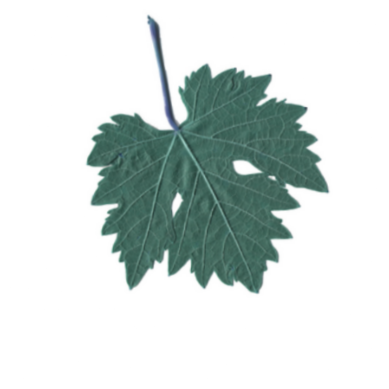

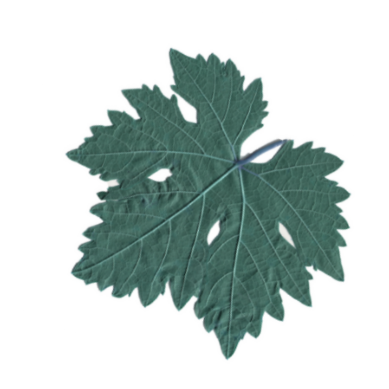

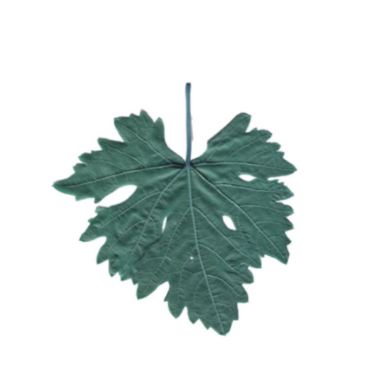

In [ ]:
for i in range(100,103):

  plt.imshow(features_Nazli[i,:,:,:])
  plt.axis('off')
  plt.show()

In [ ]:
print(features_Ak.shape,labels_Ak.shape)

print(features_Ala_Idris.shape,labels_Ala_Idris.shape)

print(features_Buzgulu.shape,labels_Buzgulu.shape)

print(features_Dimnit.shape,labels_Dimnit.shape)

print(features_Nazli.shape,labels_Nazli.shape)


(140, 427, 427, 3) (140,)
(140, 427, 427, 3) (140,)
(140, 427, 427, 3) (140,)
(140, 427, 427, 3) (140,)
(140, 427, 427, 3) (140,)


In [ ]:
X = np.concatenate((features_Ak,features_Ala_Idris,features_Buzgulu,features_Dimnit,features_Nazli),axis=0)

y = np.concatenate((labels_Ak,labels_Ala_Idris,labels_Buzgulu,labels_Dimnit,labels_Nazli),axis=0)

In [ ]:
del features_Ak
del features_Ala_Idris
del features_Buzgulu
del features_Dimnit
del features_Nazli

del labels_Ak
del labels_Ala_Idris
del labels_Buzgulu
del labels_Dimnit
del labels_Nazli

In [ ]:
y = to_categorical(y)

In [ ]:
y

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
X.shape,y.shape

((700, 427, 427, 3), (700, 5))

In [ ]:
# Function to check if images are normalized
def check_normalized_images(x_train):
    for i in range(5):  # Check 5 random images
        # Randomly select an image
        random_index = np.random.randint(0, len(x_train))
        image = x_train[random_index]

        # Check minimum and maximum pixel values
        min_pixel_value = image.min()
        max_pixel_value = image.max()

        # Print minimum and maximum pixel values
        print(f"Image {i+1}: Min Pixel Value = {min_pixel_value}, Max Pixel Value = {max_pixel_value}")

check_normalized_images(X)


Image 1: Min Pixel Value = 0.08620211287090632, Max Pixel Value = 1.0
Image 2: Min Pixel Value = 0.03137254901960784, Max Pixel Value = 1.0
Image 3: Min Pixel Value = 0.06977410636877249, Max Pixel Value = 1.0
Image 4: Min Pixel Value = 0.03256294751559483, Max Pixel Value = 1.0
Image 5: Min Pixel Value = 0.09719148374542813, Max Pixel Value = 1.0


# **Splitting data**

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True,stratify=y)

In [ ]:
X_train.shape , X_val.shape

((560, 427, 427, 3), (140, 427, 427, 3))

# **Modeling**

## **Kernels Initialization**


In [ ]:
import numpy as np
import tensorflow as tf
import keras.backend as K
from keras.initializers import Initializer
from tensorflow.keras.utils import get_custom_objects


class EfficientConv2DKernelInitializer(Initializer):
    """Initialization for convolutional kernels.

    The main difference with tf.variance_scaling_initializer is that
    tf.variance_scaling_initializer uses a truncated normal with an uncorrected
    standard deviation, whereas here we use a normal distribution. Similarly,
    tf.contrib.layers.variance_scaling_initializer uses a truncated normal with
    a corrected standard deviation.

    Args:
      shape: shape of variable
      dtype: dtype of variable
      partition_info: unused

    Returns:
      an initialization for the variable
    """

    def __call__(self, shape, dtype=K.floatx(), **kwargs):
        kernel_height, kernel_width, _, out_filters = shape
        fan_out = int(kernel_height * kernel_width * out_filters)
        return tf.random.normal(
            shape, mean=0.0, stddev=np.sqrt(2.0 / fan_out), dtype=dtype)


class EfficientDenseKernelInitializer(Initializer):
    """Initialization for dense kernels.

    This initialization is equal to
      tf.variance_scaling_initializer(scale=1.0/3.0, mode='fan_out',
                                      distribution='uniform').
    It is written out explicitly here for clarity.

    Args:
      shape: shape of variable
      dtype: dtype of variable

    Returns:
      an initialization for the variable
    """

    def __call__(self, shape, dtype=K.floatx(), **kwargs):
        """Initialization for dense kernels.

        This initialization is equal to
          tf.variance_scaling_initializer(scale=1.0/3.0, mode='fan_out',
                                          distribution='uniform').
        It is written out explicitly here for clarity.

        Args:
          shape: shape of variable
          dtype: dtype of variable

        Returns:
          an initialization for the variable
        """
        init_range = 1.0 / np.sqrt(shape[1])
        return tf.random.uniform(shape, -init_range, init_range, dtype=dtype)


conv_kernel_initializer = EfficientConv2DKernelInitializer()
dense_kernel_initializer = EfficientDenseKernelInitializer()


get_custom_objects().update({
    'EfficientDenseKernelInitializer': EfficientDenseKernelInitializer,
    'EfficientConv2DKernelInitializer': EfficientConv2DKernelInitializer,
})

In [ ]:
import tensorflow as tf
import tensorflow.keras.backend as K
import tensorflow.keras.layers as KL
from tensorflow.keras.utils import get_custom_objects

class Swish(KL.Layer):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
    def call(self, inputs, **kwargs):
        return tf.nn.swish(inputs)


class DropConnect(KL.Layer):
    def __init__(self, drop_connect_rate=0.0, **kwargs):
        super(DropConnect, self).__init__(**kwargs)
        self.drop_connect_rate = drop_connect_rate

    def call(self, inputs, training=None):
        def drop_connect():
            keep_prob = 1.0 - self.drop_connect_rate
            batch_size = tf.shape(inputs)[0]
            random_tensor = tf.random.uniform([batch_size, 1, 1, 1], dtype=inputs.dtype)
            random_tensor += keep_prob
            binary_tensor = tf.floor(random_tensor)
            output = tf.divide(inputs, keep_prob) * binary_tensor
            return output

        return K.in_train_phase(drop_connect, inputs, training=training)



        return K.in_train_phase(drop_connect, inputs, training=training)

    def get_config(self):
        config = super().get_config()
        config['drop_connect_rate'] = self.drop_connect_rate
        return config


get_custom_objects().update({
    'DropConnect': DropConnect,
    'Swish': Swish,
})

## **Weights**

In [ ]:
# Copyright 2019 The TensorFlow Authors. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================
"""Contains definitions for EfficientNet model.

[1] Mingxing Tan, Quoc V. Le
  EfficientNet: Rethinking Model Scaling for Convolutional Neural Networks.
  ICML'19, https://arxiv.org/abs/1905.11946
"""
import os
import re
import collections


IMAGENET_WEIGHTS = {

    'efficientnet-b0': {
        'name': 'efficientnet-b0_imagenet_1000.h5',
        'url': 'https://github.com/qubvel/efficientnet/releases/download/v0.0.1/efficientnet-b0_imagenet_1000.h5',
        'md5': 'bca04d16b1b8a7c607b1152fe9261af7',
    },

    'efficientnet-b0-notop': {
        'name': 'efficientnet-b0_imagenet_1000_notop.h5',
        'url': 'https://github.com/qubvel/efficientnet/releases/download/v0.0.1/efficientnet-b0_imagenet_1000_notop.h5',
        'md5': '45d2f3b6330c2401ef66da3961cad769',
    },

    'efficientnet-b1': {
        'name': 'efficientnet-b1_imagenet_1000.h5',
        'url': 'https://github.com/qubvel/efficientnet/releases/download/v0.0.1/efficientnet-b1_imagenet_1000.h5',
        'md5': 'bd4a2b82f6f6bada74fc754553c464fc',
    },

    'efficientnet-b1-notop': {
        'name': 'efficientnet-b1_imagenet_1000_notop.h5',
        'url': 'https://github.com/qubvel/efficientnet/releases/download/v0.0.1/efficientnet-b1_imagenet_1000_notop.h5',
        'md5': '884aed586c2d8ca8dd15a605ec42f564',
    },

    'efficientnet-b2': {
        'name': 'efficientnet-b2_imagenet_1000.h5',
        'url': 'https://github.com/qubvel/efficientnet/releases/download/v0.0.1/efficientnet-b2_imagenet_1000.h5',
        'md5': '45b28b26f15958bac270ab527a376999',
    },

    'efficientnet-b2-notop': {
        'name': 'efficientnet-b2_imagenet_1000_notop.h5',
        'url': 'https://github.com/qubvel/efficientnet/releases/download/v0.0.1/efficientnet-b2_imagenet_1000_notop.h5',
        'md5': '42fb9f2d9243d461d62b4555d3a53b7b',
    },

    'efficientnet-b3': {
        'name': 'efficientnet-b3_imagenet_1000.h5',
        'url': 'https://github.com/qubvel/efficientnet/releases/download/v0.0.1/efficientnet-b3_imagenet_1000.h5',
        'md5': 'decd2c8a23971734f9d3f6b4053bf424',
    },

    'efficientnet-b3-notop': {
        'name': 'efficientnet-b3_imagenet_1000_notop.h5',
        'url': 'https://github.com/qubvel/efficientnet/releases/download/v0.0.1/efficientnet-b3_imagenet_1000_notop.h5',
        'md5': '1f7d9a8c2469d2e3d3b97680d45df1e1',
    },

}


GlobalParams = collections.namedtuple('GlobalParams', [
    'batch_norm_momentum', 'batch_norm_epsilon', 'dropout_rate', 'data_format',
    'num_classes', 'width_coefficient', 'depth_coefficient',
    'depth_divisor', 'min_depth', 'drop_connect_rate',
])
GlobalParams.__new__.__defaults__ = (None,) * len(GlobalParams._fields)

BlockArgs = collections.namedtuple('BlockArgs', [
    'kernel_size', 'num_repeat', 'input_filters', 'output_filters',
    'expand_ratio', 'id_skip', 'strides', 'se_ratio'
])
# defaults will be a public argument for namedtuple in Python 3.7
# https://docs.python.org/3/library/collections.html#collections.namedtuple
BlockArgs.__new__.__defaults__ = (None,) * len(BlockArgs._fields)


def efficientnet_params(model_name):
  """Get efficientnet params based on model name."""
  params_dict = {
      # (width_coefficient, depth_coefficient, resolution, dropout_rate)
      'efficientnet-b0': (1.0, 1.0, 224, 0.2),
      'efficientnet-b1': (1.0, 1.1, 240, 0.2),
      'efficientnet-b2': (1.1, 1.2, 260, 0.3),
      'efficientnet-b3': (1.2, 1.4, 300, 0.3),
      'efficientnet-b4': (1.4, 1.8, 380, 0.4),
      'efficientnet-b5': (1.6, 2.2, 456, 0.4),
      'efficientnet-b6': (1.8, 2.6, 528, 0.5),
      'efficientnet-b7': (2.0, 3.1, 600, 0.5),
  }
  return params_dict[model_name]


class BlockDecoder(object):
  """Block Decoder for readability."""

  def _decode_block_string(self, block_string):
    """Gets a block through a string notation of arguments."""
    assert isinstance(block_string, str)
    ops = block_string.split('_')
    options = {}
    for op in ops:
      splits = re.split(r'(\d.*)', op)
      if len(splits) >= 2:
        key, value = splits[:2]
        options[key] = value

    if 's' not in options or len(options['s']) != 2:
      raise ValueError('Strides options should be a pair of integers.')

    return BlockArgs(
        kernel_size=int(options['k']),
        num_repeat=int(options['r']),
        input_filters=int(options['i']),
        output_filters=int(options['o']),
        expand_ratio=int(options['e']),
        id_skip=('noskip' not in block_string),
        se_ratio=float(options['se']) if 'se' in options else None,
        strides=[int(options['s'][0]), int(options['s'][1])])

  def _encode_block_string(self, block):
    """Encodes a block to a string."""
    args = [
        'r%d' % block.num_repeat,
        'k%d' % block.kernel_size,
        's%d%d' % (block.strides[0], block.strides[1]),
        'e%s' % block.expand_ratio,
        'i%d' % block.input_filters,
        'o%d' % block.output_filters
    ]
    if block.se_ratio > 0 and block.se_ratio <= 1:
      args.append('se%s' % block.se_ratio)
    if block.id_skip is False:
      args.append('noskip')
    return '_'.join(args)

  def decode(self, string_list):
    """Decodes a list of string notations to specify blocks inside the network.

    Args:
      string_list: a list of strings, each string is a notation of block.

    Returns:
      A list of namedtuples to represent blocks arguments.
    """
    assert isinstance(string_list, list)
    blocks_args = []
    for block_string in string_list:
      blocks_args.append(self._decode_block_string(block_string))
    return blocks_args

  def encode(self, blocks_args):
    """Encodes a list of Blocks to a list of strings.

    Args:
      blocks_args: A list of namedtuples to represent blocks arguments.
    Returns:
      a list of strings, each string is a notation of block.
    """
    block_strings = []
    for block in blocks_args:
      block_strings.append(self._encode_block_string(block))
    return block_strings


def efficientnet(width_coefficient=None,
                 depth_coefficient=None,
                 dropout_rate=0.2,
                 drop_connect_rate=0.2):
  """Creates a efficientnet model."""
  blocks_args = [
      'r1_k3_s11_e1_i32_o16_se0.25', 'r2_k3_s22_e6_i16_o24_se0.25',
      'r2_k5_s22_e6_i24_o40_se0.25', 'r3_k3_s22_e6_i40_o80_se0.25',
      'r3_k5_s11_e6_i80_o112_se0.25', 'r4_k5_s22_e6_i112_o192_se0.25',
      'r1_k3_s11_e6_i192_o320_se0.25',
  ]
  global_params = GlobalParams(
      batch_norm_momentum=0.99,
      batch_norm_epsilon=1e-3,
      dropout_rate=dropout_rate,
      drop_connect_rate=drop_connect_rate,
      data_format='channels_last',
      num_classes=1000,
      width_coefficient=width_coefficient,
      depth_coefficient=depth_coefficient,
      depth_divisor=8,
      min_depth=None)
  decoder = BlockDecoder()
  return decoder.decode(blocks_args), global_params


def get_model_params(model_name, override_params=None):
  """Get the block args and global params for a given model."""
  if model_name.startswith('efficientnet'):
    width_coefficient, depth_coefficient, input_shape, dropout_rate = (
        efficientnet_params(model_name))
    blocks_args, global_params = efficientnet(
        width_coefficient, depth_coefficient, dropout_rate)
  else:
    raise NotImplementedError('model name is not pre-defined: %s' % model_name)

  if override_params:
    # ValueError will be raised here if override_params has fields not included
    # in global_params.
    global_params = global_params._replace(**override_params)

  #print('global_params= %s', global_params)
  #print('blocks_args= %s', blocks_args)
  return blocks_args, global_params, input_shape


## **EfficientNet Architecture**

In [ ]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import collections
import math
import numpy as np
import six
from six.moves import xrange  # pylint: disable=redefined-builtin
import tensorflow as tf
import tensorflow.keras.backend as K
import tensorflow.keras.models as KM
import tensorflow.keras.layers as KL
from tensorflow.keras.utils import get_file
from tensorflow.keras.initializers import Initializer


__all__ = ['EfficientNet', 'EfficientNetB0', 'EfficientNetB1', 'EfficientNetB2', 'EfficientNetB3',
           'EfficientNetB4', 'EfficientNetB5', 'EfficientNetB6', 'EfficientNetB7']

class ConvKernalInitializer(Initializer):
    def __call__(self, shape, dtype=K.floatx(), partition_info=None):
        """Initialization for convolutional kernels.

        The main difference with tf.variance_scaling_initializer is that
        tf.variance_scaling_initializer uses a truncated normal with an uncorrected
        standard deviation, whereas here we use a normal distribution. Similarly,
        tf.contrib.layers.variance_scaling_initializer uses a truncated normal with
        a corrected standard deviation.

        Args:
        shape: shape of variable
        dtype: dtype of variable
        partition_info: unused

        Returns:
        an initialization for the variable
        """
        del partition_info
        kernel_height, kernel_width, _, out_filters = shape
        fan_out = int(kernel_height * kernel_width * out_filters)
        return tf.random.normal(
            shape, mean=0.0, stddev=np.sqrt(2.0 / fan_out), dtype=dtype)

class DenseKernalInitializer(Initializer):
    def __call__(self, shape, dtype=K.floatx(), partition_info=None):
        """Initialization for dense kernels.

        This initialization is equal to
        tf.variance_scaling_initializer(scale=1.0/3.0, mode='fan_out',
                                        distribution='uniform').
        It is written out explicitly here for clarity.

        Args:
        shape: shape of variable
        dtype: dtype of variable
        partition_info: unused

        Returns:
        an initialization for the variable
        """
        del partition_info
        init_range = 1.0 / np.sqrt(shape[1])
        return tf.random_uniform(shape, -init_range, init_range, dtype=dtype)


def round_filters(filters, global_params):
    """Round number of filters based on depth multiplier."""
    orig_f = filters
    multiplier = global_params.width_coefficient
    divisor = global_params.depth_divisor
    min_depth = global_params.min_depth
    if not multiplier:
        return filters

    filters *= multiplier
    min_depth = min_depth or divisor
    new_filters = max(min_depth, int(filters + divisor / 2) // divisor * divisor)
    # Make sure that round down does not go down by more than 10%.
    if new_filters < 0.9 * filters:
        new_filters += divisor
    # print('round_filter input={} output={}'.format(orig_f, new_filters))
    return int(new_filters)


def round_repeats(repeats, global_params):
    """Round number of filters based on depth multiplier."""
    multiplier = global_params.depth_coefficient
    if not multiplier:
        return repeats
    return int(math.ceil(multiplier * repeats))


def SEBlock(block_args, global_params):
    num_reduced_filters = max(
        1, int(block_args.input_filters * block_args.se_ratio))
    filters = block_args.input_filters * block_args.expand_ratio
    if global_params.data_format == 'channels_first':
        channel_axis = 1
        spatial_dims = [2, 3]
    else:
        channel_axis = -1
        spatial_dims = [1, 2]

    def block(inputs):
        x = inputs
        x = KL.Lambda(lambda a: K.mean(a, axis=spatial_dims, keepdims=True))(x)
        x = KL.Conv2D(
            num_reduced_filters,
            kernel_size=[1, 1],
            strides=[1, 1],
            kernel_initializer=ConvKernalInitializer(),
            padding='same',
            use_bias=True
        )(x)
        x = Swish()(x)
        # Excite
        x = KL.Conv2D(
            filters,
            kernel_size=[1, 1],
            strides=[1, 1],
            kernel_initializer=ConvKernalInitializer(),
            padding='same',
            use_bias=True
        )(x)
        x = KL.Activation('sigmoid')(x)
        out = KL.Multiply()([x, inputs])
        return out

    return block


def MBConvBlock(block_args, global_params, drop_connect_rate=None):
    batch_norm_momentum = global_params.batch_norm_momentum
    batch_norm_epsilon = global_params.batch_norm_epsilon

    if global_params.data_format == 'channels_first':
        channel_axis = 1
        spatial_dims = [2, 3]
    else:
        channel_axis = -1
        spatial_dims = [1, 2]

    has_se = (block_args.se_ratio is not None) and (
            block_args.se_ratio > 0) and (block_args.se_ratio <= 1)

    filters = block_args.input_filters * block_args.expand_ratio
    kernel_size = block_args.kernel_size

    def block(inputs):

        if block_args.expand_ratio != 1:
            x = KL.Conv2D(
                filters,
                kernel_size=[1, 1],
                strides=[1, 1],
                kernel_initializer=ConvKernalInitializer(),
                padding='same',
                use_bias=False
            )(inputs)
            x = KL.BatchNormalization(
                axis=channel_axis,
                momentum=batch_norm_momentum,
                epsilon=batch_norm_epsilon
            )(x)
            x = Swish()(x)
        else:
            x = inputs

        x = KL.DepthwiseConv2D(
            [kernel_size, kernel_size],
            strides=block_args.strides,
            depthwise_initializer=ConvKernalInitializer(),
            padding='same',
            use_bias=False
        )(x)
        x = KL.BatchNormalization(
            axis=channel_axis,
            momentum=batch_norm_momentum,
            epsilon=batch_norm_epsilon
        )(x)
        x = Swish()(x)

        if has_se:
            x = SEBlock(block_args, global_params)(x)

        # output phase

        x = KL.Conv2D(
            block_args.output_filters,
            kernel_size=[1, 1],
            strides=[1, 1],
            kernel_initializer=ConvKernalInitializer(),
            padding='same',
            use_bias=False
        )(x)
        x = KL.BatchNormalization(
            axis=channel_axis,
            momentum=batch_norm_momentum,
            epsilon=batch_norm_epsilon
        )(x)

        if block_args.id_skip:
            if all(
                    s == 1 for s in block_args.strides
            ) and block_args.input_filters == block_args.output_filters:
                # only apply drop_connect if skip presents.
                if drop_connect_rate:
                    x = DropConnect(drop_connect_rate)(x)
                x = KL.Add()([x, inputs])
        return x

    return block


def EfficientNet(input_shape, block_args_list, global_params, include_top=True, pooling=None):
    batch_norm_momentum = global_params.batch_norm_momentum
    batch_norm_epsilon = global_params.batch_norm_epsilon
    if global_params.data_format == 'channels_first':
        channel_axis = 1
    else:
        channel_axis = -1

    # Stem part
    inputs = KL.Input(shape=input_shape)
    x = inputs
    x = KL.Conv2D(
        filters=round_filters(32, global_params),
        kernel_size=[3, 3],
        strides=[2, 2],
        kernel_initializer=ConvKernalInitializer(),
        padding='same',
        use_bias=False
    )(x)
    x = KL.BatchNormalization(
        axis=channel_axis,
        momentum=batch_norm_momentum,
        epsilon=batch_norm_epsilon
    )(x)
    x = Swish()(x)

    # Blocks part
    block_idx = 1
    n_blocks = sum([block_args.num_repeat for block_args in block_args_list])
    drop_rate = global_params.drop_connect_rate or 0
    drop_rate_dx = drop_rate / n_blocks

    for block_args in block_args_list:
        assert block_args.num_repeat > 0
        # Update block input and output filters based on depth multiplier.
        block_args = block_args._replace(
            input_filters=round_filters(block_args.input_filters, global_params),
            output_filters=round_filters(block_args.output_filters, global_params),
            num_repeat=round_repeats(block_args.num_repeat, global_params)
        )

        # The first block needs to take care of stride and filter size increase.
        x = MBConvBlock(block_args, global_params,
                        drop_connect_rate=drop_rate_dx * block_idx)(x)
        block_idx += 1

        if block_args.num_repeat > 1:
            block_args = block_args._replace(input_filters=block_args.output_filters, strides=[1, 1])

        for _ in xrange(block_args.num_repeat - 1):
            x = MBConvBlock(block_args, global_params,
                            drop_connect_rate=drop_rate_dx * block_idx)(x)
            block_idx += 1

    # Head part
    x = KL.Conv2D(
        filters=round_filters(1280, global_params),
        kernel_size=[1, 1],
        strides=[1, 1],
        kernel_initializer=ConvKernalInitializer(),
        padding='same',
        use_bias=False
    )(x)
    x = KL.BatchNormalization(
        axis=channel_axis,
        momentum=batch_norm_momentum,
        epsilon=batch_norm_epsilon
    )(x)
    x = Swish()(x)

    if include_top:
        x = KL.GlobalAveragePooling2D(data_format=global_params.data_format)(x)
        if global_params.dropout_rate > 0:
            x = KL.Dropout(global_params.dropout_rate)(x)
        x = KL.Dense(global_params.num_classes, kernel_initializer=DenseKernalInitializer())(x)
        x = KL.Activation('softmax')(x)
    else:
        if pooling == 'avg':
            x = KL.GlobalAveragePooling2D(data_format=global_params.data_format)(x)
        elif pooling == 'max':
            x = KL.GlobalMaxPooling2D(data_format=global_params.data_format)(x)

    outputs = x
    model = KM.Model(inputs, outputs)

    return model


def _get_model_by_name(model_name, input_shape=None, include_top=True, weights=None, classes=1000, pooling=None):
    """Re-Implementation of EfficientNet for Keras

    Reference:
        https://arxiv.org/abs/1807.11626

    Args:
        input_shape: optional, if ``None`` default_input_shape is used
            EfficientNetB0 - (224, 224, 3)
            EfficientNetB1 - (240, 240, 3)
            EfficientNetB2 - (260, 260, 3)
            EfficientNetB3 - (300, 300, 3)
            EfficientNetB4 - (380, 380, 3)
            EfficientNetB5 - (456, 456, 3)
            EfficientNetB6 - (528, 528, 3)
            EfficientNetB7 - (600, 600, 3)
        include_top: whether to include the fully-connected
            layer at the top of the network.
        weights: one of `None` (random initialization),
              'imagenet' (pre-training on ImageNet).
        classes: optional number of classes to classify images
            into, only to be specified if `include_top` is True, and
            if no `weights` argument is specified.
        pooling: optional [None, 'avg', 'max'], if ``include_top=False``
            add global pooling on top of the network
            - avg: GlobalAveragePooling2D
            - max: GlobalMaxPooling2D

    Returns:
        A Keras model instance.

    """
    if weights not in {None, 'imagenet'}:
        raise ValueError('Parameter `weights` should be one of [None, "imagenet"]')

    if weights == 'imagenet' and model_name not in IMAGENET_WEIGHTS:
        raise ValueError('There are not pretrained weights for {} model.'.format(model_name))

    if weights == 'imagenet' and include_top and classes != 1000:
        raise ValueError('If using `weights` and `include_top`'
                         ' `classes` should be 1000')

    block_agrs_list, global_params, default_input_shape = get_model_params(
        model_name, override_params={'num_classes': classes}
    )

    if input_shape is None:
        input_shape = (default_input_shape, default_input_shape, 3)

    model = EfficientNet(input_shape, block_agrs_list, global_params, include_top=include_top, pooling=pooling)
    model._name = model_name

    if weights:
        if not include_top:
            weights_name = model_name + '-notop'
        else:
            weights_name = model_name
        weights = IMAGENET_WEIGHTS[weights_name]
        weights_path = get_file(
            weights['name'],
            weights['url'],
            cache_subdir='models',
            md5_hash=weights['md5'],
        )
        model.load_weights(weights_path)

    return model


def EfficientNetB0(include_top=True, input_shape=None, weights=None, classes=5, pooling=None):
    return _get_model_by_name('efficientnet-b0', include_top=include_top, input_shape=input_shape,
                              weights=weights, classes=classes, pooling=pooling)


def EfficientNetB1(include_top=True, input_shape=None, weights=None, classes=5, pooling=None):
    return _get_model_by_name('efficientnet-b1', include_top=include_top, input_shape=input_shape,
                              weights=weights, classes=classes, pooling=pooling)


def EfficientNetB2(include_top=True, input_shape=None, weights=None, classes=1000, pooling=None):
    return _get_model_by_name('efficientnet-b2', include_top=include_top, input_shape=input_shape,
                              weights=weights, classes=classes, pooling=pooling)


def EfficientNetB3(include_top=True, input_shape=None, weights=None, classes=1000, pooling=None):
    return _get_model_by_name('efficientnet-b3', include_top=include_top, input_shape=input_shape,
                              weights=weights, classes=classes, pooling=pooling)


def EfficientNetB4(include_top=True, input_shape=None, weights=None, classes=1000, pooling=None):
    return _get_model_by_name('efficientnet-b4', include_top=include_top, input_shape=input_shape,
                              weights=weights, classes=classes, pooling=pooling)


def EfficientNetB5(include_top=True, input_shape=None, weights=None, classes=1000, pooling=None):
    return _get_model_by_name('efficientnet-b5', include_top=include_top, input_shape=input_shape,
                              weights=weights, classes=classes, pooling=pooling)


def EfficientNetB6(include_top=True, input_shape=None, weights=None, classes=1000, pooling=None):
    return _get_model_by_name('efficientnet-b6', include_top=include_top, input_shape=input_shape,
                              weights=weights, classes=classes, pooling=pooling)


def EfficientNetB7(include_top=True, input_shape=None, weights=None, classes=1000, pooling=None):
    return _get_model_by_name('efficientnet-b7', include_top=include_top, input_shape=input_shape,
                              weights=weights, classes=classes, pooling=pooling)


EfficientNetB0.__doc__ = _get_model_by_name.__doc__
EfficientNetB1.__doc__ = _get_model_by_name.__doc__
EfficientNetB2.__doc__ = _get_model_by_name.__doc__
EfficientNetB3.__doc__ = _get_model_by_name.__doc__
EfficientNetB4.__doc__ = _get_model_by_name.__doc__
EfficientNetB5.__doc__ = _get_model_by_name.__doc__
EfficientNetB6.__doc__ = _get_model_by_name.__doc__
EfficientNetB7.__doc__ = _get_model_by_name.__doc__

## **Base model and fully connected layer**

In [ ]:
base_model = EfficientNetB0(weights='imagenet',
                            include_top=False,
                            input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))

for layer in base_model.layers:
    layer.trainable = False  # Freeze all layers

# Step 3: Add additional layers
x = base_model.output
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
output = tf.keras.layers.Dense(5, activation='softmax')(x)

# Create a new model with the added layers
model = tf.keras.Model(inputs=base_model.input, outputs=output)

# Step 4: Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 427, 427, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 214, 214, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 214, 214, 32)         128       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 swish (Swish)               (None, 214, 214, 32)         0         ['batch_normalization[0]

In [ ]:
history = model.fit(
    X_train,y_train,
    epochs=15,
    validation_data=(X_val, y_val),
    batch_size = 32
)

Epoch 1/15
18/18 [==============================] - 246s 13s/step - loss: 1.8310 - accuracy: 0.3071 - val_loss: 1.1177 - val_accuracy: 0.6500
Epoch 2/15
18/18 [==============================] - 237s 13s/step - loss: 1.0200 - accuracy: 0.6321 - val_loss: 0.6467 - val_accuracy: 0.8000
Epoch 3/15
18/18 [==============================] - 272s 15s/step - loss: 0.7217 - accuracy: 0.7071 - val_loss: 0.5693 - val_accuracy: 0.8143
Epoch 4/15
18/18 [==============================] - 273s 15s/step - loss: 0.5589 - accuracy: 0.7821 - val_loss: 0.4098 - val_accuracy: 0.8357
Epoch 5/15
18/18 [==============================] - 280s 16s/step - loss: 0.5477 - accuracy: 0.8089 - val_loss: 0.4256 - val_accuracy: 0.8714
Epoch 6/15
18/18 [==============================] - 246s 14s/step - loss: 0.5286 - accuracy: 0.8036 - val_loss: 0.3791 - val_accuracy: 0.8643
Epoch 7/15
18/18 [==============================] - 275s 15s/step - loss: 0.4117 - accuracy: 0.8589 - val_loss: 0.3201 - val_accuracy: 0.8714
Epoch 

In [ ]:
model.save('EfficientNetB0_15(430size)trial3_.h5')

# **Test data**

In [ ]:
DATASET_DIR = "/content/drive/MyDrive/Grapevine_Leaves_Image_Dataset/Test"

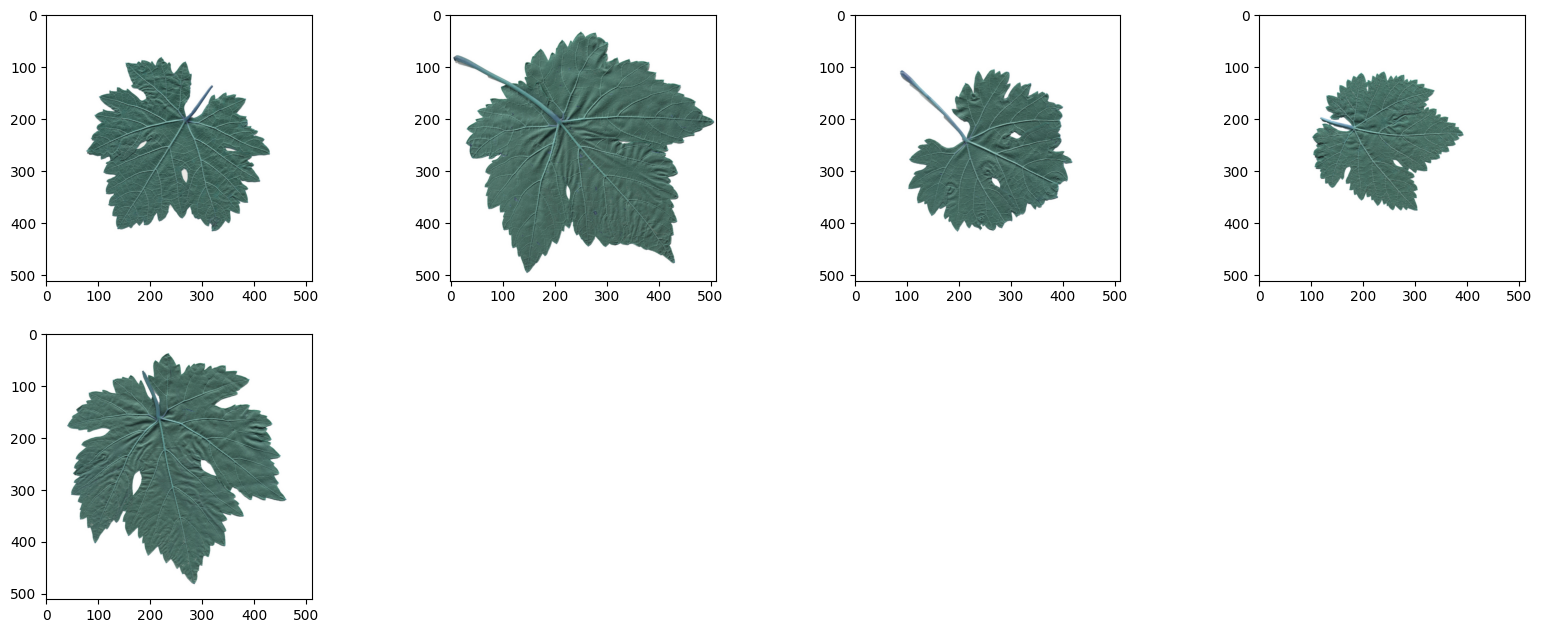

In [ ]:
plt.figure(figsize = (20,20))

random_range = random.sample(range(len(all_classes_names)), 5)

for counter, random_index in enumerate(random_range, 1):


    # Retrieve the list of all the video files present in the randomly selected Class Directory.
    image_files_names_list = os.listdir(f'/content/drive/MyDrive/Grapevine_Leaves_Image_Dataset/Test/')

    # Randomly select a video file from the list retrieved from the randomly selected Class Directory.
    selected_image_file_name = random.choice(image_files_names_list)

    img = cv2.imread(f'/content/drive/MyDrive/Grapevine_Leaves_Image_Dataset/Test/{selected_image_file_name}')



    # Display the image.
    plt.subplot(5, 4, counter);plt.imshow(img);plt.axis('on')

In [ ]:
generator1=ImageDataGenerator(zoom_range=[0.6, 0.7])
generator2=ImageDataGenerator(zoom_range=[0.9, 1.0])

def create_testset():
    '''
    This function will extract the data of the selected classes and create the
    required dataset.
    Returns:
        features:          A list containing the extracted images.
        labels:            A list containing the indexes of the classes associated with the images.
    '''

    features = []


    files_list = os.listdir(DATASET_DIR)
    i=0
    for file_name in files_list:

      img = os.path.join(DATASET_DIR,file_name)
      img=cv2.imread(img)

      white_pixels = (img[:, :, 0] > 240) & (img[:, :, 1] > 240) & (img[:, :, 2] > 240)
      percentage=np.sum(white_pixels)/(img.shape[0]*img.shape[1])*100
      # img[white_pixels]=0
      if percentage >= 80:
         img=generator1.random_transform(img)
      else:
         img=generator2.random_transform(img)




      img = cv2.resize(img, (IMAGE_HEIGHT, IMAGE_WIDTH))

      img = img/255.0

      features.append(img)

      i+=1
    print(f"Number of test data = ",i)

    features = np.array(features)

    return features

In [ ]:
test_data=create_testset()

Number of test data =  150


In [ ]:
test_data.shape

(150, 427, 427, 3)

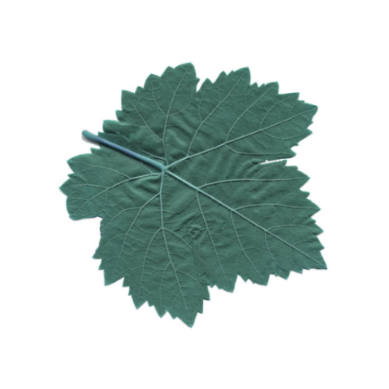

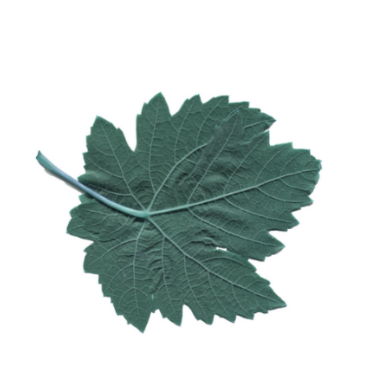

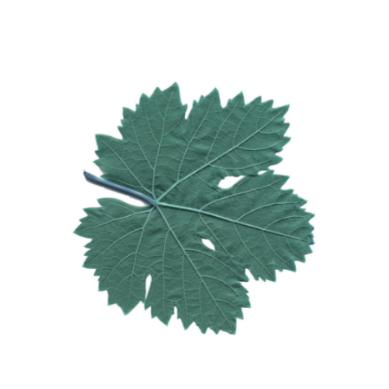

In [ ]:
for i in range(3):

  plt.imshow(test_data[i,:,:,:])
  plt.axis('off')
  plt.show()

In [ ]:
predictions = model.predict(test_data)
predicted_classes = np.argmax(predictions, axis=1)

5/5 [==============================] - 54s 9s/step


In [ ]:
predicted_classes

array([0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 2, 2, 3,
       2, 3, 2, 2, 0, 2, 4, 2, 2, 0, 2, 3, 3, 3, 2, 2, 2, 3, 2, 3, 2, 2,
       2, 3, 3, 2, 3, 3, 2, 3, 0, 3, 3, 3, 2, 2, 2, 3, 3, 2, 3, 3, 2, 3,
       2, 3, 2, 3, 3, 3, 3, 2, 3, 2, 2, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4,
       4, 3, 4, 0, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

# **Submission**

In [ ]:
filenames_without_extension = [filename.replace(".png", "") for filename in os.listdir(DATASET_DIR)]

pred={
    'ID':filenames_without_extension,
    'label':predicted_classes
}

submit=pd.DataFrame(pred)
submit.head()

ID  label
0   image4      0
1  image29      0
2   image7      3
3  image28      0
4  image13      0

In [ ]:
submit.tail()

ID  label
145  image150      4
146  image136      4
147  image130      4
148  image144      4
149  image149      4

In [ ]:
right_pd=pd.read_csv("/content/samy_submission_v4_black.csv")

In [ ]:
matches = (submit == right_pd).all(axis=1)
false_count = matches.value_counts()[False]

# Calculate the percentage of matching rows
match_percentage = (matches.sum() / len(right_pd)) * 100
print("Percentage of matching rows:", match_percentage)
print("Number of unmatched ",false_count )

Percentage of matching rows: 78.0
Number of unmatched  33


In [ ]:
submit.to_csv("EfficientNetB0_15epochs(430)-trial3_submission.csv",index=False)